In [1]:
import pandas as pd
def read_file(path):
    df= pd.read_csv(path)
    return df
read_file('message-weather (1).csv')

,city,date_weather,latitude_decimal,longitude_decimal,max_temperature,min_temperature,region_x,temperature,wind_direction,wind_speed,weather_description,date_hour_x,tg_message
0,Суми,2022-12-02 12:32,50.911944,34.803333,-0.2,-3.3,Сумська,-0.2,343,31.2,Overcast,2022-12-02 12:00:00,💥 Хотінь (Сумська обл.)\r\nЗагроза артилерійсь...
1,Марганець,2022-12-02 11:33,47.644722,34.604167,2.7,-0.1,Дніпропетровська,2.7,3,28.5,Overcast,2022-12-02 11:00:00,💥 Марганець (Дніпропетровська обл.)\r\nЗагроза...
2,Дніпро,2022-12-02 11:33,48.466111,35.025278,1.7,-1.6,Дніпропетровська,1.7,357,29.9,Partly cloudy,2022-12-02 11:00:00,💥 Марганець (Дніпропетровська обл.)\r\nЗагроза...
3,Нікополь,2022-12-02 11:33,47.577222,34.357500,2.4,0.1,Дніпропетровська,2.4,7,25.4,Overcast,2022-12-02 11:00:00,💥 Марганець (Дніпропетровська обл.)\r\nЗагроза...
4,Дніпро,2022-12-02 11:33,48.466111,35.025278,1.7,-1.6,Дніпропетровська,1.7,357,29.9,Partly cloudy,2022-12-02 11:00:00,💥 Марганець (Дніпропетровська обл.)\r\nЗагроза...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8798,Херсон,2023-04-01 09:06,46.640000,32.614444,18.1,10.2,Херсонська,16.9,248,45.4,Mainly clear,2023-04-01 09:00:00,Херсонська область. Інформація щодо ворожих об...
8799,Херсон,2023-03-30 16:20,46.640000,32.614444,16.2,3.1,Херсонська,10.7,245,27.7,Mainly clear,2023-03-30 16:00:00,​​⚡️Отримав осколкове поранення під час бомбар...
8800,Херсон,2023-03-10 08:43,46.640000,32.614444,-1.5,-6.3,Херсонська,-2.7,65,36.1,Overcast,2023-03-10 08:00:00,Херсонська область. Інформація щодо ворожих об...
8801,Херсон,2023-03-10 08:43,46.640000,32.614444,-1.5,-6.3,Херсонська,-2.7,65,36.1,Overcast,2023-03-10 08:00:00,Херсонська область. Інформація щодо ворожих об...


In [8]:

def calculate_max_attacks(df):
    alarm_keywords = ['💥', '📍', '⚠️']
    df['alarm'] = df['tg_message'].apply(lambda x: any(keyword in x for keyword in alarm_keywords))
    df[['date', 'time']] = df['date_weather'].str.split(' ', n=1, expand=True)
    df['month'] = pd.to_datetime(df['date']).dt.month_name()
    df_count = df.groupby(['region_x', 'month']).size().reset_index(name='number_of_attacks')
    df_max_attacks = df_count.loc[df_count.groupby('region_x')['number_of_attacks'].idxmax()]
    df_max_attacks['region_x'] = df_max_attacks['region_x']
    df_max_attacks = df_max_attacks.reset_index(drop=True)
    return df_max_attacks[['region_x', 'month', 'number_of_attacks']]
calculate_max_attacks(read_file('message-weather (1).csv'))

,region_x,month,number_of_attacks
0,Івано-Франківська,December,1
1,Вінницька,March,10
2,Дніпропетровська,November,636
3,Донецька,March,811
4,Житомирська,March,23
5,Запорізька,January,55
6,Київська,January,111
7,Кіровоградська,October,5
8,Луганська,March,251
9,Львівська,February,149


In [3]:
def month_attack(df):
    alarm_keywords = ['💥', '📍', '⚠️']
    df['alarm'] = df['tg_message'].apply(lambda x: any(keyword in x for keyword in alarm_keywords))
    df[['date', 'time']] = df['date_weather'].str.split(' ', n=1, expand=True)
    df['month'] = pd.to_datetime(df['date']).dt.month_name()
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    alerts_df = df[df['tg_message'].str.contains('💥|📍|⚠️', regex=True)]
    alerts_by_month = alerts_df.groupby('month').size().reindex(month_order, fill_value=0).reset_index(name='number_of_attacks')

    return alerts_by_month
month_attack(read_file('message-weather (1).csv'))

,month,number_of_attacks
0,January,813
1,February,707
2,March,816
3,April,344
4,May,0
5,June,0
6,July,0
7,August,0
8,September,0
9,October,110


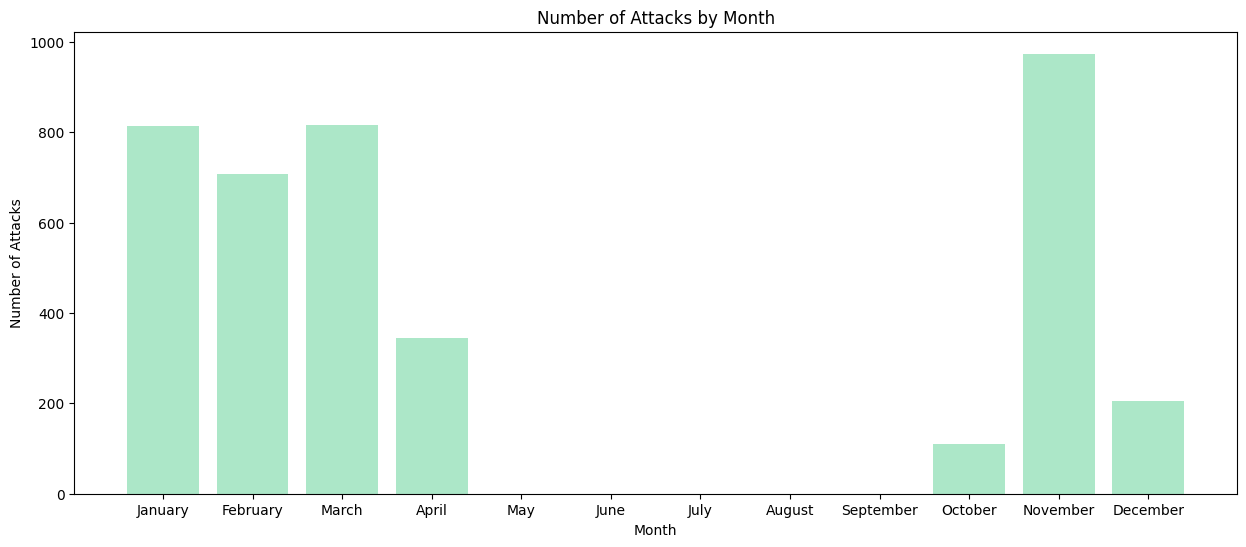

In [2]:
import matplotlib.pyplot as plt

def month_attack(df):
    alarm_keywords = ['💥', '📍', '⚠️']
    df['alarm'] = df['tg_message'].apply(lambda x: any(keyword in x for keyword in alarm_keywords))
    df[['date', 'time']] = df['date_weather'].str.split(' ', n=1, expand=True)
    df['month'] = pd.to_datetime(df['date']).dt.month_name()
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    alerts_df = df[df['tg_message'].str.contains('💥|📍|⚠️', regex=True)]
    alerts_by_month = alerts_df.groupby('month').size().reindex(month_order, fill_value=0).reset_index(name='number_of_attacks')

    plt.figure(figsize=(15, 6))
    plt.bar(alerts_by_month['month'], alerts_by_month['number_of_attacks'], color='#ACE7C8')
    plt.title('Number of Attacks by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Attacks')
    plt.show()
month_attack(read_file('message-weather (1).csv'))

In [40]:
def region_temperature(df):
    new_data = {'region_x': [], 'temperature': [], 'attack_count': []}
    alarm_keywords = ['💥', '📍', '⚠️']
    
    for _, row in df.iterrows():
        region = row['region_x']
        temp = row['temperature']
        tg_messages = row['tg_message']
        
        has_alarm = any(keyword in tg_messages for keyword in alarm_keywords)
        
        if has_alarm:
            new_data['region_x'].append(region)
            new_data['temperature'].append(temp)
            new_data['attack_count'].append(1)

    result_df = pd.DataFrame(new_data)
    result_df = result_df.groupby(['region_x', 'temperature']).agg({'attack_count': 'sum'})

    return result_df
region_temperature(read_file('message-weather (1).csv'))


attack_count
region_x          temperature              
Івано-Франківська  5.4                    1
Вінницька         -3.9                    3
                   1.3                    1
                   1.5                    2
                   6.2                    1
...                                     ...
Хмельницька        5.5                    3
                   9.9                    1
Черкаська          9.5                    1
Чернівецька        10.4                   2
Чернігівська       12.2                   2

[851 rows x 1 columns]

In [3]:
def process_temperature(df):
    new_data = {'temperature': [], 'alarm_count': []}
    alarm_keywords = ['💥', '📍', '⚠️']
    for _, row in df.iterrows():
        temperature = row['temperature']
        alarm = row['tg_message']
        has_alarm = any(keyword in alarm for keyword in alarm_keywords)
        if has_alarm:
            new_data['temperature'].append(temperature)
            new_data['alarm_count'].append(1) 
    df_filtered = df[df['tg_message'].str.contains('|'.join(alarm_keywords))]
    count_warm = df_filtered[df_filtered['temperature'] > 14]['tg_message'].count()
    count_cold = df_filtered[df_filtered['temperature'] <= 14]['tg_message'].count()
    return f"Тривог при температурі > 14: {count_warm}, при температурі <= 14: {count_cold}"
process_temperature(read_file('message-weather (1).csv'))

'Тривог при температурі > 14: 147, при температурі <= 14: 3823'

In [7]:
def process_data(df):
    hours = []
    number = []
    for i in range(24):
        if i == 9:
            hours.append(f'[0{i}:00-{i + 1}:00)')
        elif i < 10:
            hours.append(f'[0{i}:00-0{i + 1}:00)')
        else:
            hours.append(f'[{i}:00-{i + 1}:00)')
        count = 0
        for j in range(len(df)):
            if int(df.date_weather[j].split()[1].split(':')[0]) == i:
                if ("💥" in df.tg_message[j]) | ("📍" in df.tg_message[j]) | ("⚠️" in df.tg_message[j]):
                    count += df.tg_message[j].count("💥") + df.tg_message[j].count("⚠️") + df.tg_message[j].count("📍")
        number.append(count)

    return pd.DataFrame({'hours': hours, 'attacks': number})
process_data(read_file('message-weather (1).csv'))

,hours,attacks
0,[00:00-01:00),341
1,[01:00-02:00),342
2,[02:00-03:00),105
3,[03:00-04:00),136
4,[04:00-05:00),82
5,[05:00-06:00),45
6,[06:00-07:00),62
7,[07:00-08:00),109
8,[08:00-09:00),3388
9,[09:00-10:00),1613


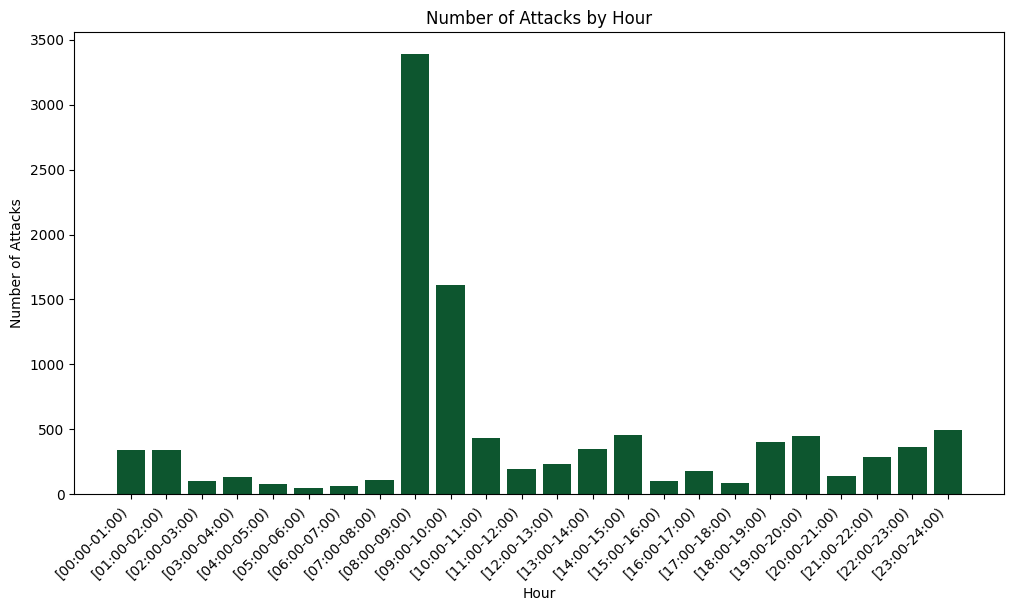

In [6]:
import matplotlib.pyplot as plt

def process_data(df):
    hours = []
    number = []
    for i in range(24):
        if i == 9:
            hours.append(f'[0{i}:00-{i + 1}:00)')
        elif i < 10:
            hours.append(f'[0{i}:00-0{i + 1}:00)')
        else:
            hours.append(f'[{i}:00-{i + 1}:00)')
        count = 0
        for j in range(len(df)):
            if int(df.date_weather[j].split()[1].split(':')[0]) == i:
                if ("💥" in df.tg_message[j]) | ("📍" in df.tg_message[j]) | ("⚠️" in df.tg_message[j]):
                    count += df.tg_message[j].count("💥") + df.tg_message[j].count("⚠️") + df.tg_message[j].count("📍")
        number.append(count)

    data = pd.DataFrame({'hours': hours, 'attacks': number})

    plt.figure(figsize=(12, 6))
    plt.bar(data['hours'], data['attacks'], color='#0D562F')
    plt.title('Number of Attacks by Hour')
    plt.xlabel('Hour')
    plt.ylabel('Number of Attacks')
    plt.xticks(rotation=45, ha='right')
    plt.show()
process_data(read_file('message-weather (1).csv'))


In [6]:
def flag_direction(df, show_statistics=True):
    mod_stats = df.loc[df['city'] == 'Львів', ['city', 'date_weather', 'wind_direction']]
    direction_name = []
    for i in mod_stats['wind_direction']:
        if i in range(31) or i in range(320, 360):
            direction_name.append("Шевченківський район")
        elif i in range(31, 125):
            direction_name.append('Личаківський район')
        elif i in range(125, 145):
            direction_name.append('Сихівський район')
        elif i in range(145, 180):
            direction_name.append('Палильня УКУ')
        elif i in range(180, 250):
            direction_name.append('Франківський район')
        elif i in range(250, 290):
            direction_name.append('Залізничний район')
        elif i in range(290, 320):
            direction_name.append('Левандівка')
    mod_stats['direction_name'] = direction_name
    if show_statistics:
        direction = ["Шевченківський район", 'Личаківський район', 'Сихівський район', 'Палильня УКУ',
                  'Франківський район', 'Залізничний район', 'Левандівка']
        counts = [direction_name.count("Шевченківський район"),
                  direction_name.count("Личаківський район"),
                  direction_name.count("Сихівський район"),
                  direction_name.count("Палильня УКУ"),
                  direction_name.count("Франківський район"),
                  direction_name.count("Залізничний район"),
                  direction_name.count("Левандівка")]

        data = pd.DataFrame({'City': ['Львів'] * len(direction), 'Region': direction, "Counts": counts})
        return data

    return mod_stats
flag_direction(read_file('message-weather (1).csv'))

,City,Region,Counts
0,Львів,Шевченківський район,18
1,Львів,Личаківський район,24
2,Львів,Сихівський район,12
3,Львів,Палильня УКУ,32
4,Львів,Франківський район,31
5,Львів,Залізничний район,3
6,Львів,Левандівка,2
